# Plotting Pandapower Networks

Zone "A" and Zone "B"

The number of given colors (1) is smaller than the number of nodes (179) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (89) to draw! The colors will be repeated to fit.


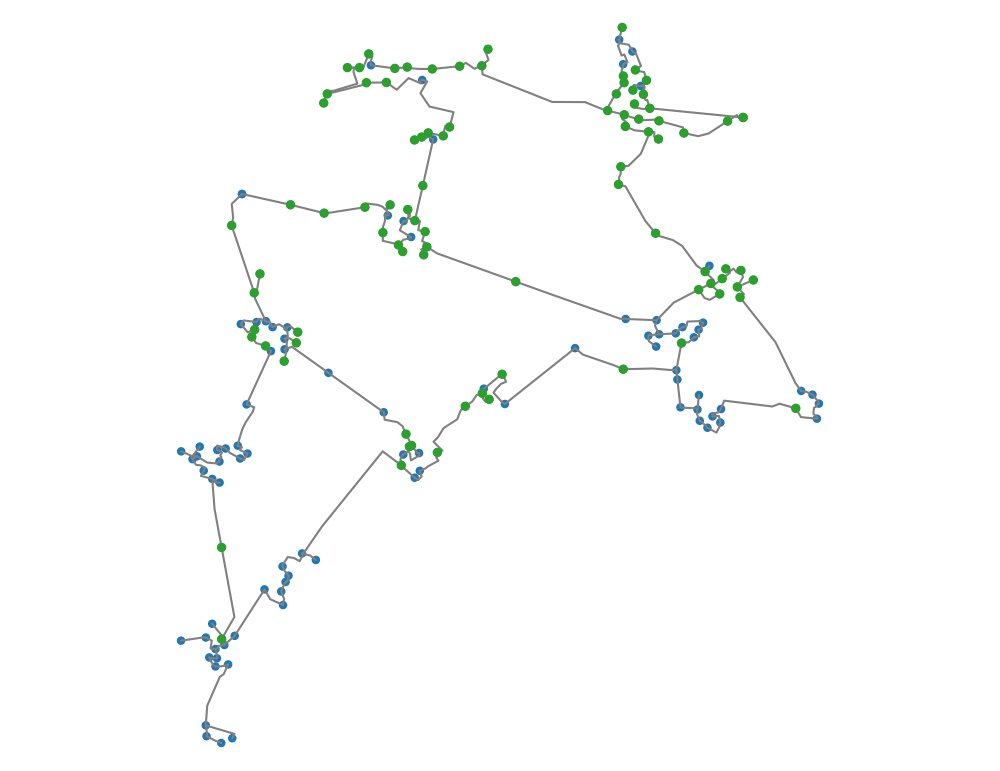

In [37]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import seaborn
net = nw.mv_oberrhein()
colors = seaborn.color_palette()

nr_buses = len(net.bus.index)//2
net.bus.loc[net.bus.index[:nr_buses], "zone"] = "A"
net.bus.loc[net.bus.index[nr_buses:], "zone"] = "B"
net.bus.zone.head()


bc = plot.create_bus_collection(net, buses=net.bus.index, color=colors[0], size=80, zorder=1)
lc = plot.create_line_collection(net, lines=net.line.index, color='grey', zorder=2)

busesA = net.bus[net.bus.zone == 'A'].index
bcA = plot.create_bus_collection(net, busesA, size=90, color=colors[2], zorder=11)
plot.draw_collections([lc, bc, bcA])
plt.show()

Load Busses

<AxesSubplot: >

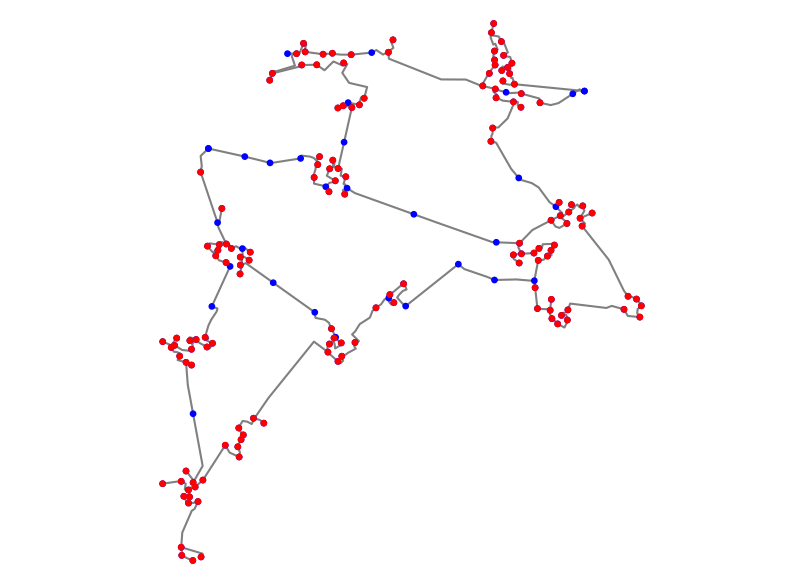

In [51]:
net = nw.mv_oberrhein()
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=80, color='blue', zorder=2) #create buses


lbc = plot.create_bus_collection(net, net.load.bus.values, size=80, color='red', zorder=2)
plot.draw_collections([lc, bc, lbc], figsize=(8,6)) # plot lines and buses

Loaded lines more than 40%

<AxesSubplot: >

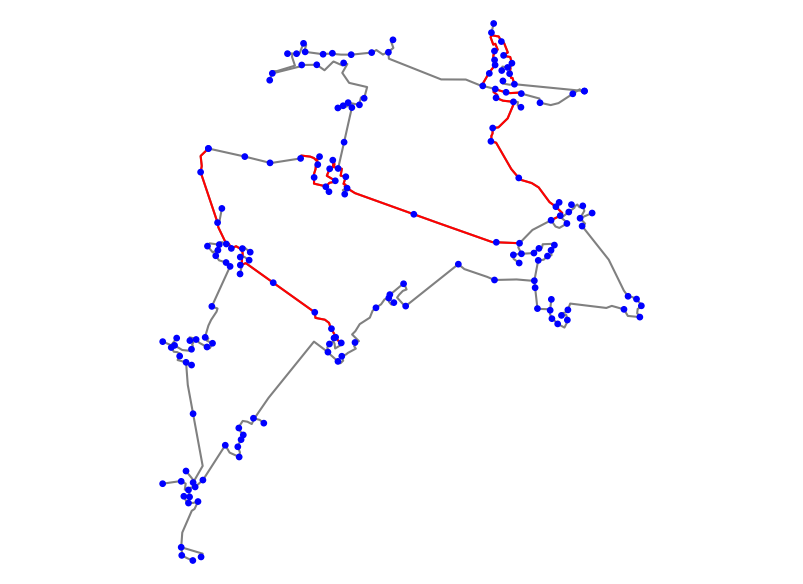

In [56]:

pp.runpp(net)
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=80, color='blue', zorder=2) #create buses
more_loaded_lines = net.res_line[net.res_line.loading_percent > 40].index
lch = plot.create_line_collection(net, more_loaded_lines, color='red', zorder=1)
plot.draw_collections([lc, lch, bc], figsize=(8,6))